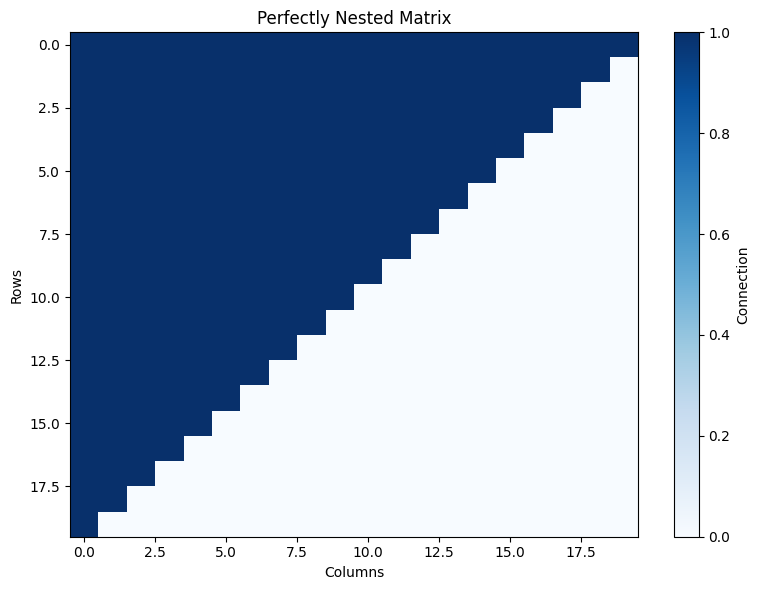

1.0
Observed Nestedness (NODF): 1.0000
Generating 1000 null models (preserving degrees)...


100%|██████████| 1000/1000 [00:09<00:00, 100.21it/s]
C:\Users\joao.melga\AppData\Local\Temp\ipykernel_64936\2548308296.py:66: RuntimeWarning: invalid value encountered in scalar divide
  z_score = (nestedness_score - mean_null) / std_null



Nestedness Significance Analysis:
Observed NODF: 1.0000
Null model mean NODF: 1.0000
Null model std dev: 0.0000
Z-score: nan
Empirical p-value: 1.0000
Significance: Not significant at α=0.05


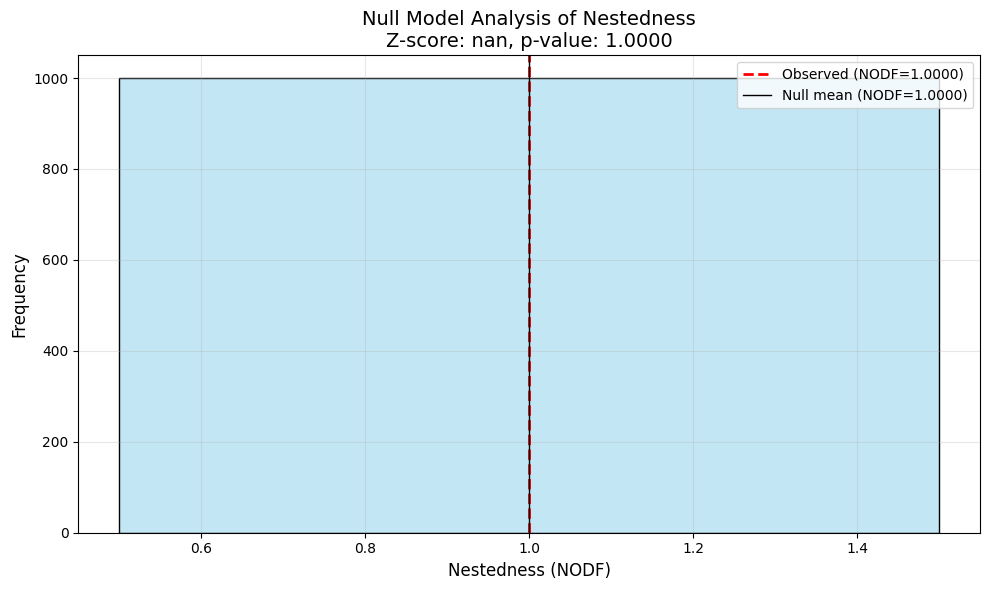

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # For progress bar
import seaborn as sns

import sys

sys.path.append('../libs') 

from nestedsness_calculator import *
from curveball import *

# Create a 20 x 20 perfectly nested matrix
perfectly_nested_matrix = np.zeros((20, 20))

# Fill the matrix in a perfectly nested pattern
for i in range(20):
  for j in range(20 - i):
    perfectly_nested_matrix[i, j] = 1

# Visualize the matrix
plt.figure(figsize=(8, 6))
plt.imshow(perfectly_nested_matrix, cmap='Blues', aspect='auto')
plt.colorbar(label='Connection')
plt.title('Perfectly Nested Matrix')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.tight_layout()
plt.show()
calculator = NestednessCalculator(perfectly_nested_matrix)
nestedness_score = calculator.nodf(perfectly_nested_matrix)
print(nestedness_score)

# Calculate observed nestedness score (already done in your code)
# nestedness_score = calculator.nodf(adjacency_matrix)
print(f"Observed Nestedness (NODF): {nestedness_score:.4f}")

# Generate null models and calculate their nestedness scores
n_iterations = 1000  # Number of null models to generate
n_iterations_cv = 4000  # Number of null models to generate
null_nestedness_scores = []

print(f"Generating {n_iterations} null models (preserving degrees)...")
for i in tqdm(range(n_iterations)):
    # Generate a null model matrix by swapping while preserving degrees
    M = perfectly_nested_matrix.copy()
    r_hp = find_presences(M)
    RM = curve_ball(M, r_hp, n_iterations_cv)
    
    null_matrix = RM.astype(perfectly_nested_matrix.dtype)

    # Calculate nestedness of the null model
    try:
        calculator_null = NestednessCalculator(null_matrix)
        null_score = calculator_null.nodf(null_matrix)
        null_nestedness_scores.append(null_score)
    except Exception as e:
        print(f"Error in iteration {i}: {e}")

# Convert to numpy array for calculations
null_nestedness_scores_np = np.array(null_nestedness_scores)

# Calculate statistics
mean_null = np.mean(null_nestedness_scores_np)
std_null = np.std(null_nestedness_scores_np)
z_score = (nestedness_score - mean_null) / std_null
p_value = np.sum(null_nestedness_scores_np >= nestedness_score) / len(null_nestedness_scores_np)

print("\nNestedness Significance Analysis:")
print(f"Observed NODF: {nestedness_score:.4f}")
print(f"Null model mean NODF: {mean_null:.4f}")
print(f"Null model std dev: {std_null:.4f}")
print(f"Z-score: {z_score:.4f}")
print(f"Empirical p-value: {p_value:.4f}")
print(f"Significance: {'Significant' if p_value < 0.05 else 'Not significant'} at α=0.05")

# Visualize the results
plt.figure(figsize=(10, 6))
sns.histplot(null_nestedness_scores_np, kde=True, color='skyblue')
plt.axvline(nestedness_score, color='red', linestyle='--', linewidth=2, 
            label=f'Observed (NODF={nestedness_score:.4f})')
plt.axvline(mean_null, color='black', linestyle='-', linewidth=1, 
            label=f'Null mean (NODF={mean_null:.4f})')
plt.title(f'Null Model Analysis of Nestedness\nZ-score: {z_score:.4f}, p-value: {p_value:.4f}', 
          fontsize=14)
plt.xlabel('Nestedness (NODF)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

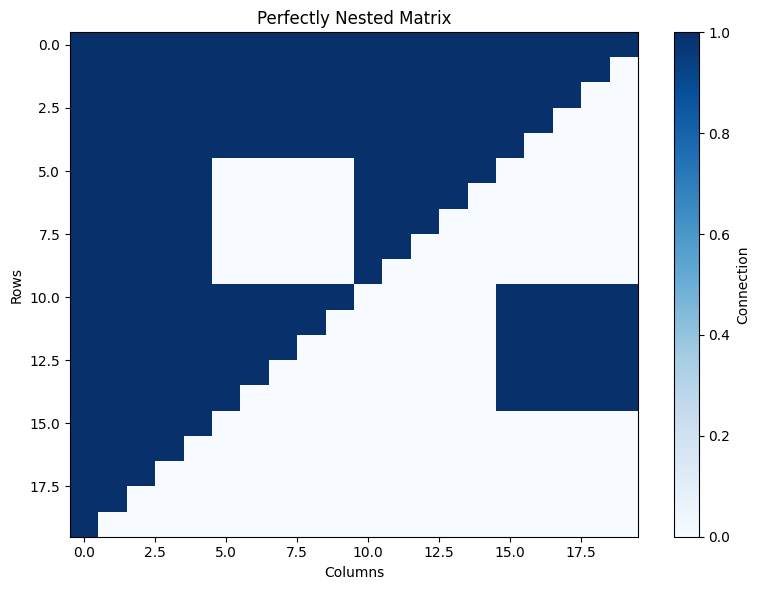

0.8740816931606404
Observed Nestedness (NODF): 0.8741
Generating 1000 null models (preserving degrees)...


100%|██████████| 1000/1000 [00:12<00:00, 77.41it/s]



Nestedness Significance Analysis:
Observed NODF: 0.8741
Null model mean NODF: 0.8701
Null model std dev: 0.0014
Z-score: 2.8055
Empirical p-value: 0.0000
Significance: Significant at α=0.05


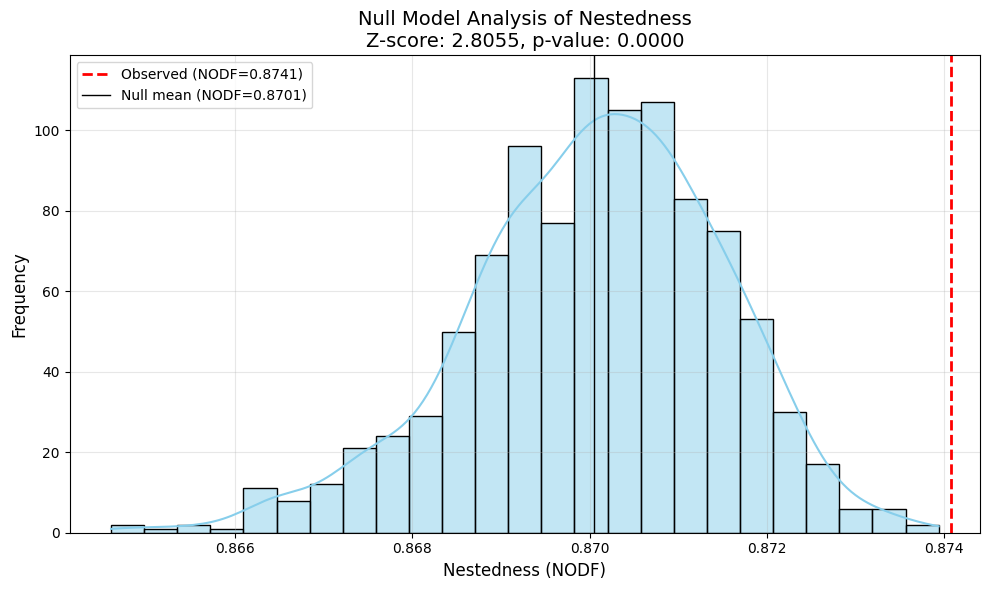

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # For progress bar
import seaborn as sns
from nestedsness_calculator import *
from curveball import *

# Create a 20 x 20 perfectly nested matrix
not_perfectly_nested_matrix = np.zeros((20, 20))

# Fill the matrix in a perfectly nested pattern
# First create a perfectly nested matrix
for i in range(20):
  for j in range(20 - i):
    not_perfectly_nested_matrix[i, j] = 1

# Now add violations of nestedness
# 1. Add some 1s where there should be 0s
for i in range(10, 15):
  for j in range(15, 20):
    not_perfectly_nested_matrix[i, j] = 1  # Add a block of 1s in the lower right

# 2. Remove some 1s where there should be 1s
for i in range(5, 10):
  for j in range(5, 10):
    not_perfectly_nested_matrix[i, j] = 0  # Remove a block of 1s in the middle

# Visualize the matrix
plt.figure(figsize=(8, 6))
plt.imshow(not_perfectly_nested_matrix, cmap='Blues', aspect='auto')
plt.colorbar(label='Connection')
plt.title('Perfectly Nested Matrix')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.tight_layout()
plt.show()
calculator = NestednessCalculator(not_perfectly_nested_matrix)
nestedness_score = calculator.nodf(not_perfectly_nested_matrix)
print(nestedness_score)

# Calculate observed nestedness score (already done in your code)
# nestedness_score = calculator.nodf(adjacency_matrix)
print(f"Observed Nestedness (NODF): {nestedness_score:.4f}")

# Generate null models and calculate their nestedness scores
n_iterations = 1000  # Number of null models to generate
n_iterations_cv = 4000  # Number of null models to generate
null_nestedness_scores = []

print(f"Generating {n_iterations} null models (preserving degrees)...")
for i in tqdm(range(n_iterations)):
    # Generate a null model matrix by swapping while preserving degrees
    M = not_perfectly_nested_matrix.copy()
    r_hp = find_presences(M)
    RM = curve_ball(M, r_hp, n_iterations_cv)
    
    null_matrix = RM.astype(not_perfectly_nested_matrix.dtype)

    # Calculate nestedness of the null model
    try:
        calculator_null = NestednessCalculator(null_matrix)
        null_score = calculator_null.nodf(null_matrix)
        null_nestedness_scores.append(null_score)
    except Exception as e:
        print(f"Error in iteration {i}: {e}")

# Convert to numpy array for calculations
null_nestedness_scores_np = np.array(null_nestedness_scores)

# Calculate statistics
mean_null = np.mean(null_nestedness_scores_np)
std_null = np.std(null_nestedness_scores_np)
z_score = (nestedness_score - mean_null) / std_null
p_value = np.sum(null_nestedness_scores_np >= nestedness_score) / len(null_nestedness_scores_np)

print("\nNestedness Significance Analysis:")
print(f"Observed NODF: {nestedness_score:.4f}")
print(f"Null model mean NODF: {mean_null:.4f}")
print(f"Null model std dev: {std_null:.4f}")
print(f"Z-score: {z_score:.4f}")
print(f"Empirical p-value: {p_value:.4f}")
print(f"Significance: {'Significant' if p_value < 0.05 else 'Not significant'} at α=0.05")

# Visualize the results
plt.figure(figsize=(10, 6))
sns.histplot(null_nestedness_scores_np, kde=True, color='skyblue')
plt.axvline(nestedness_score, color='red', linestyle='--', linewidth=2, 
            label=f'Observed (NODF={nestedness_score:.4f})')
plt.axvline(mean_null, color='black', linestyle='-', linewidth=1, 
            label=f'Null mean (NODF={mean_null:.4f})')
plt.title(f'Null Model Analysis of Nestedness\nZ-score: {z_score:.4f}, p-value: {p_value:.4f}', 
          fontsize=14)
plt.xlabel('Nestedness (NODF)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()